# Пассивный фильтр

## L фильтр
<img src="img/L_filter.png" align="left"/>

In [30]:
import math
class LR():
    def __init__(self, l, r):
        self.l, self.r = l, r
    @property
    def tau(self): return self.l/self.r
    def r_l(self, f): return 2*math.pi*f*self.l
    def gain(self, f):
        return self.r/(self.r+self.r_l(f))

L = 0.010000; R = 150.000000
τ = 0.000067; 1/τ = 15000.000000


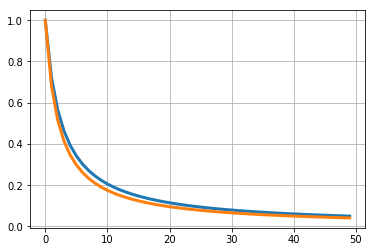

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
l, l_tolerance, r = 10e-3, .1, 150
lr, lr1, lr2 = LR(l, r), LR(l*(1-l_tolerance), 150), LR(l*(1+l_tolerance), 150)
print('L = {:f}; R = {:f}'.format(lr.l, lr.r))
print('τ = {:f}; 1/τ = {:f}'.format(lr.tau, 1/lr.tau))
x_range = numpy.linspace(0, 3/lr1.tau)
plt.plot([ lr1.gain(i) for i in x_range ], linewidth=3)
plt.plot([ lr2.gain(i) for i in x_range ], linewidth=3)
plt.grid()

## LC фильтр
<img src="img/LC_filter.png" align="left"/>

In [63]:
import math
class LC():
    def __init__(self, l, c):
        self.l, self.c = l, c
    @property
    def f0(self): return 1/(2*math.pi*math.sqrt(self.l*self.c))
    def r_l(self, f): return 2*math.pi*f*self.l
    def r_c(self, f): return 1/(2*math.pi*f*self.c)
    def gain(self, f):
        return self.r_c(f)/(self.r_c(f)+self.r_l(f))
class CL():
    def __init__(self, l, c):
        self.l, self.c = l, c
    @property
    def f0(self): return 1/(2*math.pi*math.sqrt(self.l*self.c))
    def r_l(self, f): return 2*math.pi*f*self.l
    def r_c(self, f): return 1/(2*math.pi*f*self.c)
    def gain(self, f):
        return self.r_l(f)/(self.r_c(f)+self.r_l(f))

F0 = 2321.5134420947206


/home/vika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/vika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/vika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


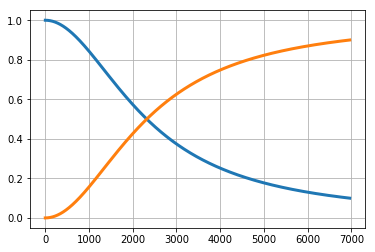

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
l, c = 10e-3, 470e-9
lc, cl = LC(l, c), CL(l, c)
print('F0 = {}'.format(lc.f0))
x_range = numpy.linspace(0, 3*lc.f0, num=int(3*lc.f0))
plt.plot([ lc.gain(i) for i in x_range ], linewidth=3)
plt.plot([ cl.gain(i) for i in x_range ], linewidth=3)
plt.grid()